In [191]:
import numpy as np
import pandas as pd
import rpy2.robjects as robjects
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data = pd.read_csv('/content/drive/MyDrive/UPersonas.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,415,423,424,431,432,440) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ola,consecutivo,llave,hogar,llave_n16,hogar_n16,orden,seguimiento,llave_ID_lb,llaveper,llaveper_n16,edad,edad_meses,edad_tot_meses,sexo,parentesco,id_dpto_nac,id_mpio_nac,pais_nac,nac_dia,nac_mes,nac_ano,embarazada,estado_civil,vive_conyuge,orden_conyuge,fecha_edad,mes_unionm,ano_unionm,edad_unionm,etnia,padre_vive,orden_padre,madre_vive,orden_madre,parent_inform,inform_orden,novedad_perso,afiliacion,...,siempre_ayuda,hace_la_paga,violar_ley,justicia_propia,uso_violencia,voto_popular,ind_bienestar,desigualdad,paga_soborno,ayu_congresista,resolvio_congres,ayu_alcalde,resolvio_alcalde,ayu_lcomunal,resolvio_lcomunal,medid1_molestan,medid2_molestan,medid3a_molestan,medid3b_molestan,medid3c_molestan,medid3d_molestan,firma_paz,evitar_iva,fuente_tv,fuente_diarios,fuente_radio,fuente_revistas,fuente_libros,fuente_internet,fuente_amigos,acepta_dinero,vr_aleatorio,vende_voto,valor_voto,voto_secreto,voto_ofrecido,nom_partido,fexpers_2010,fpers_2010,fpers_2016
0,0,3,111001,11100101.0,1.0,1.110010e+09,1,1,1,11100101.0,1.110010e+09,1.110010e+11,60,9,NaN,2,1,NaN,NaN,NaN,15,5,1955,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2,NaN,NaN,NaN,0,1.0,...,1.0,4.0,2.0,2.0,4.0,2.0,1.0,1.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,,1.0,$150.000,2.0,2.0,NaN,1.095778,1552.98691,1543.77
1,1,3,111001,NaN,NaN,1.110010e+09,1,6,2,NaN,NaN,1.110010e+11,40,2,NaN,2,3,14.0,193.0,NaN,22,12,1975,2.0,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2,NaN,1,1.0,NaN,NaN,32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1543.77
2,2,3,111001,NaN,NaN,1.110010e+09,1,7,2,NaN,NaN,1.110010e+11,67,7,NaN,1,11,2.0,120.0,NaN,28,7,1948,NaN,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,3,NaN,3,NaN,NaN,NaN,21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3213.04
3,3,3,111001,NaN,NaN,1.110010e+09,1,8,2,NaN,NaN,1.110010e+11,22,0,NaN,1,5,21.0,102.0,NaN,27,2,1994,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2,NaN,1,6.0,NaN,NaN,29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3175.81
4,4,3,111003,11100301.0,1.0,1.110031e+09,1,1,1,11100301.0,1.110030e+09,1.110031e+11,53,9,NaN,2,1,17.0,164.0,NaN,10,5,1962,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2,NaN,2,NaN,NaN,NaN,29,1.0,...,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,,1.0,$30.000,1.0,2.0,MOVIMIENTO SIGNIFICATIVO DE CIUDADANOS PROGRES...,1.095778,1552.98691,2600.98


##**DESCRIPCION DE VARIABLES**
**EDAD**: Las estadisticas demuestran que esta es una de las variable smas importantes para explicar "salarios" dado que en la mayor parte de los casos a mayor edad mayor salario.

**SEXO**: Dada la brecha de genero, esta variable para explicar salario es muy relevante ya que en el mercado laboral se ve discriminado la participacion femenina.

**ESTADO CIVIL** : En las empresas por lo general se ve afectado la contratacion del personal por esta variable, dado que estadisticas muestran que prefieren contratar a personas casadas, dado que brindan mas estabilidad en la compañia.

**ETNIA** : Esta variable es una muestra de discriminacion y desigualdad que se presenta en el mercado laboral en Colombia, por lo tanto la variable salario se ve afectado para las minorias.

**ESTUDIA**: La variable estudia afecta el salario por disponibilidad de tiempo y que todos los conceptos del area en el trabajo no estan consolidados.

**NIVEL EDUCATIVO**: En base al nivel educativo se promedia el salario para que asi mismo la inversion de la educacion sea retribuida a un mayor salario.

**AÑOS TRABAJADOS**: Esta variable explica a su vez la experiencia del trasbajador, por lo tanto en la variable salario es bastante importante.




In [192]:
data_filtradas=data[['edad','sexo','estado_civil', 'etnia','estudia','nivel_educ','anos_trabaja', 'vr_salario']]
data_filtradas.head()

,edad,sexo,estado_civil,etnia,estudia,nivel_educ,anos_trabaja,vr_salario
0,60,2,3,NaN,2.0,5.0,2.0,NaN
1,40,2,2,6.0,NaN,NaN,NaN,NaN
2,67,1,2,6.0,NaN,NaN,NaN,NaN
3,22,1,5,6.0,NaN,NaN,NaN,NaN
4,53,2,4,8.0,2.0,NaN,NaN,NaN


**ANALISIS EXPLORATORIO**

In [193]:
data_filtradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19298 entries, 0 to 19297
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          19298 non-null  int64  
 1   sexo          19298 non-null  int64  
 2   estado_civil  19298 non-null  int64  
 3   etnia         2858 non-null   float64
 4   estudia       17046 non-null  float64
 5   nivel_educ    2657 non-null   float64
 6   anos_trabaja  4017 non-null   float64
 7   vr_salario    2692 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 1.2 MB


In [194]:
data_filtradas.describe()

,edad,sexo,estado_civil,etnia,estudia,nivel_educ,anos_trabaja,vr_salario
count,19298.000000,19298.000000,19298.000000,2858.000000,17046.000000,2657.000000,4017.000000,2.692000e+03
mean,31.736605,1.531920,3.471707,6.815255,1.654699,5.475725,2.325118,1.033013e+06
std,20.657975,0.498993,1.677951,1.350981,0.475480,2.566340,2.794568,9.058483e+05
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000e+03
25%,14.000000,1.000000,2.000000,6.000000,1.000000,4.000000,0.000000,6.000000e+05
50%,29.000000,2.000000,5.000000,7.000000,2.000000,4.000000,1.000000,7.600000e+05
75%,48.000000,2.000000,5.000000,8.000000,2.000000,6.000000,4.000000,1.200000e+06
max,96.000000,2.000000,5.000000,8.000000,2.000000,12.000000,12.000000,1.100000e+07


In [195]:
i=0
while i<18:
  data_filtradas = data_filtradas.replace(to_replace={'edad':{i:1}},value=None)
  i+=1
i=18 
while i<97:
  data_filtradas = data_filtradas.replace(to_replace={'edad':{i:2}},value=None)
  i+=1
data_filtradas.head()

,edad,sexo,estado_civil,etnia,estudia,nivel_educ,anos_trabaja,vr_salario
0,2,2,3,NaN,2.0,5.0,2.0,NaN
1,2,2,2,6.0,NaN,NaN,NaN,NaN
2,2,1,2,6.0,NaN,NaN,NaN,NaN
3,2,1,5,6.0,NaN,NaN,NaN,NaN
4,2,2,4,8.0,2.0,NaN,NaN,NaN


In [196]:
i=0
while i<5:
  data_filtradas = data_filtradas.replace(to_replace={'estado_civil':{i:1}},value=None)
  i+=1
data_filtradas = data_filtradas.replace(to_replace={'estado_civil':{5:2}},value=None)
data_filtradas.head()

,edad,sexo,estado_civil,etnia,estudia,nivel_educ,anos_trabaja,vr_salario
0,2,2,1,NaN,2.0,5.0,2.0,NaN
1,2,2,1,6.0,NaN,NaN,NaN,NaN
2,2,1,1,6.0,NaN,NaN,NaN,NaN
3,2,1,2,6.0,NaN,NaN,NaN,NaN
4,2,2,1,8.0,2.0,NaN,NaN,NaN


In [197]:
i=0
while i<8:
  data_filtradas = data_filtradas.replace(to_replace={'etnia':{i:2}},value=None)
  i+=1
data_filtradas = data_filtradas.replace(to_replace={'etnia':{8:1}},value=None)
data_filtradas.head()

,edad,sexo,estado_civil,etnia,estudia,nivel_educ,anos_trabaja,vr_salario
0,2,2,1,NaN,2.0,5.0,2.0,NaN
1,2,2,1,2.0,NaN,NaN,NaN,NaN
2,2,1,1,2.0,NaN,NaN,NaN,NaN
3,2,1,2,2.0,NaN,NaN,NaN,NaN
4,2,2,1,1.0,2.0,NaN,NaN,NaN


In [198]:
i=0
while i<5:
  data_filtradas = data_filtradas.replace(to_replace={'nivel_educ':{i:1}},value=None)
  i+=1
i=5 
while i<13:
  data_filtradas = data_filtradas.replace(to_replace={'nivel_educ':{i:2}},value=None)
  i+=1
data_filtradas.head()

,edad,sexo,estado_civil,etnia,estudia,nivel_educ,anos_trabaja,vr_salario
0,2,2,1,NaN,2.0,2.0,2.0,NaN
1,2,2,1,2.0,NaN,NaN,NaN,NaN
2,2,1,1,2.0,NaN,NaN,NaN,NaN
3,2,1,2,2.0,NaN,NaN,NaN,NaN
4,2,2,1,1.0,2.0,NaN,NaN,NaN


In [199]:
i=0
while i<3:
  data_filtradas = data_filtradas.replace(to_replace={'anos_trabaja':{i:1}},value=None)
  i+=1
i=3 
while i<13:
  data_filtradas = data_filtradas.replace(to_replace={'anos_trabaja':{i:2}},value=None)
  i+=1
data_filtradas.head()

,edad,sexo,estado_civil,etnia,estudia,nivel_educ,anos_trabaja,vr_salario
0,2,2,1,NaN,2.0,2.0,1.0,NaN
1,2,2,1,2.0,NaN,NaN,NaN,NaN
2,2,1,1,2.0,NaN,NaN,NaN,NaN
3,2,1,2,2.0,NaN,NaN,NaN,NaN
4,2,2,1,1.0,2.0,NaN,NaN,NaN


In [200]:
data_filtradas_10=data_filtradas.sample(frac=0.1,random_state=105)
data_filtrada_10.head()
#data_filtrada_10.info()

,edad,sexo,estado_civil,etnia,estudia,nivel_educ,anos_trabaja,vr_salario
1027,1,2,5,NaN,1.0,NaN,NaN,NaN
9228,2,1,5,NaN,2.0,2.0,NaN,NaN
1633,1,2,5,NaN,1.0,NaN,NaN,NaN
3358,2,1,2,NaN,2.0,NaN,1.0,600000.0
365,2,2,3,NaN,2.0,NaN,NaN,NaN


In [201]:
eliminables = data_filtrada_10.index[:]
data_filtradas_90=data_filtradas.drop(labels=eliminables)
data_filtradas_90.head()

,edad,sexo,estado_civil,etnia,estudia,nivel_educ,anos_trabaja,vr_salario
0,2,2,1,NaN,2.0,2.0,1.0,NaN
1,2,2,1,2.0,NaN,NaN,NaN,NaN
2,2,1,1,2.0,NaN,NaN,NaN,NaN
3,2,1,2,2.0,NaN,NaN,NaN,NaN
4,2,2,1,1.0,2.0,NaN,NaN,NaN


In [202]:
data_testeo=data_filtradas_90.sample(frac=0.25,random_state=45)
data_testeo.head()
#data_testeo.info()

,edad,sexo,estado_civil,etnia,estudia,nivel_educ,anos_trabaja,vr_salario
18231,2,2,1,NaN,NaN,NaN,NaN,NaN
6862,1,2,2,1.0,NaN,NaN,NaN,NaN
10483,2,1,1,NaN,2.0,NaN,NaN,800000.0
6884,2,2,1,NaN,2.0,NaN,1.0,1800000.0
18927,2,1,1,NaN,2.0,NaN,NaN,400000.0


In [203]:
eliminables2 = data_testeo.index[:]
data_entrenamiento=data_filtradas_90.drop(labels=eliminables2)
data_entrenamiento.head()

,edad,sexo,estado_civil,etnia,estudia,nivel_educ,anos_trabaja,vr_salario
1,2,2,1,2.0,NaN,NaN,NaN,NaN
3,2,1,2,2.0,NaN,NaN,NaN,NaN
4,2,2,1,1.0,2.0,NaN,NaN,NaN
6,2,2,2,1.0,1.0,NaN,NaN,NaN
7,2,2,1,NaN,2.0,NaN,2.0,1026000.0


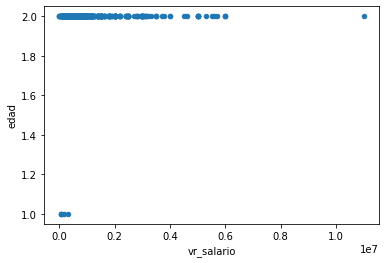

In [204]:
modelo_testeo = LinearRegression()
x = [data_testeo['vr_salario']]
y = data_testeo['edad']

data_testeo.plot(kind = 'scatter', x = 'vr_salario', y = 'edad')
plt.show()

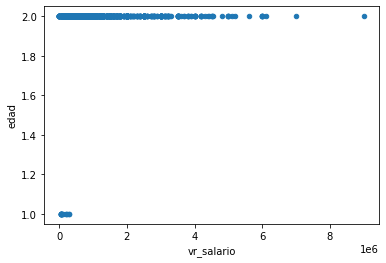

In [205]:
modelo_entrenamiento = LinearRegression()
x = [data_entrenamiento['vr_salario']]
y = data_entrenamiento['edad']

data_entrenamiento.plot(kind = 'scatter', x = 'vr_salario', y = 'edad')
plt.show()